<a href="https://colab.research.google.com/github/giovanni-lucarelli/basket/blob/main/basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

Saving games.csv to games.csv


In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/giovanni-lucarelli/basket/main/games.csv"  # Sostituisci con il link del tuo file
df = pd.read_csv(url)

print(df.head())  # Stampa le prime righe del dataframe per verificare il caricamento

  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-22  22200478            Final    1610612762       1610612764   
2    2022-12-21  22200466            Final    1610612739       1610612749   
3    2022-12-21  22200467            Final    1610612755       1610612765   
4    2022-12-21  22200468            Final    1610612737       1610612741   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   
1    2022    1610612762     120.0        0.488        0.952  ...      16.0   
2    2022    1610612739     114.0        0.482        0.786  ...      22.0   
3    2022    1610612755     113.0        0.441        0.909  ...      27.0   
4    2022    1610612737     108.0        0.429        1.000  ...      22.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_P

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [10]:
nan_counts = df.isna().sum()
print(nan_counts)

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64


In [12]:
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows["GAME_DATE_EST"].unique())
# 2 weeks of missing data

['2003-10-24' '2003-10-23' '2003-10-22' '2003-10-21' '2003-10-20'
 '2003-10-19' '2003-10-18' '2003-10-17' '2003-10-16' '2003-10-15'
 '2003-10-14' '2003-10-13' '2003-10-12' '2003-10-11' '2003-10-10'
 '2003-10-09' '2003-10-08' '2003-10-07']


In [17]:
df = df.dropna()
df['GAME_STATUS_TEXT'].unique()
df = df.drop(columns=['GAME_STATUS_TEXT'])

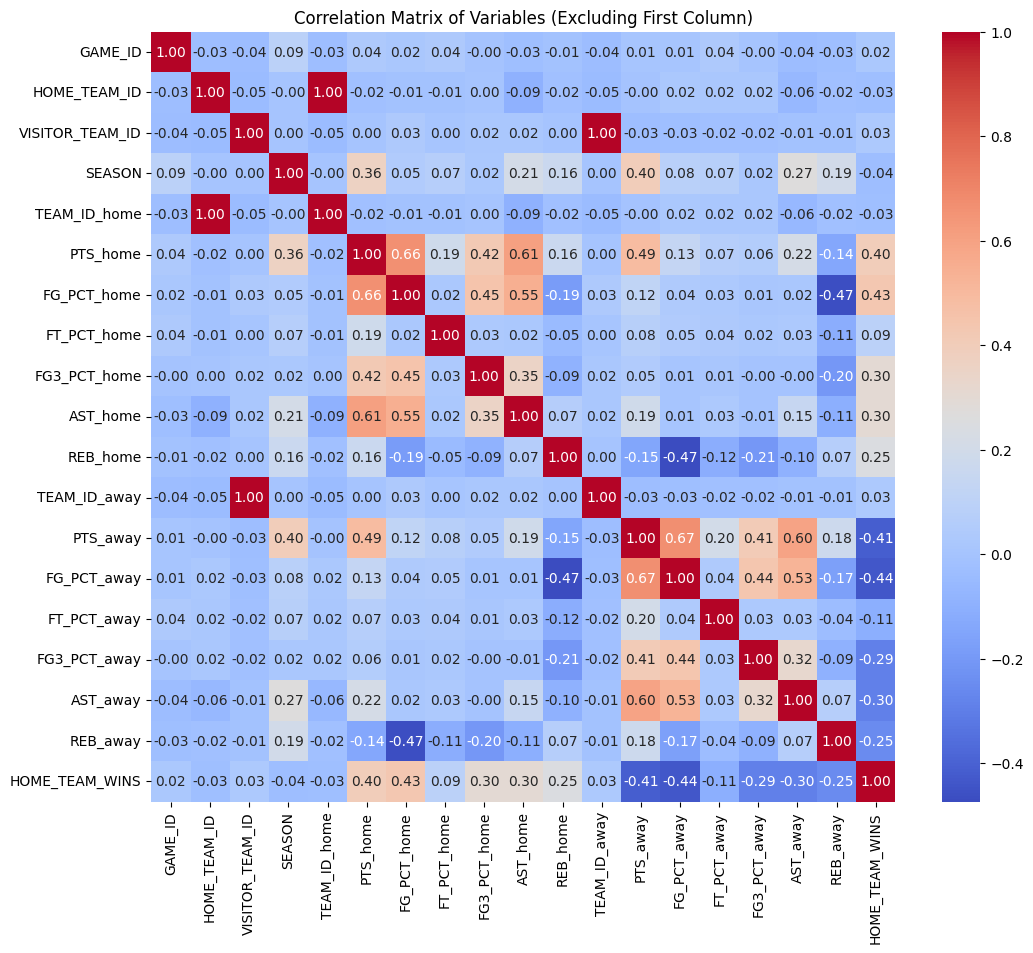

In [21]:
# prompt: correlation matrix between all variables except first column and seaborn correlation matrix graph

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for all columns except the first one
correlation_matrix = df.iloc[:, 1:].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables (Excluding First Column)')
plt.show()

In [24]:
new_df = df.drop(columns=['TEAM_ID_home','TEAM_ID_away', "SEASON"])
df.columns


Index(['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON',
       'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS', 'game_date_est'],
      dtype='object')

In [25]:
# prompt: create a new dataframe where for each unique "GAME_ID" find the previous (in order of time, as indicated by "GAME_DATE_EST") 5 games in which the same "HOME_TEAM_ID" played (it could be present in "HOME_TEAM_ID" or in "VISITOR_TEAM_ID"). For these 5 games, compute a column that has the mean of  "PTS_home" if you found the id in "HOME_TEAM_ID" or the mean of "PTS_away" if you found the id in "VISITOR_TEAM_ID"

import pandas as pd

# Assuming 'df' is your DataFrame from the previous code

def get_previous_games_stats(df):
    # Sort the DataFrame by GAME_DATE_EST
    df_sorted = df.sort_values(by='GAME_DATE_EST')

    # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        game_date = row['GAME_DATE_EST']

        # Find the 5 previous games for the same home team
        previous_games = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)


        # Calculate the mean of PTS_home or PTS_away for previous games
        previous_game_stats = []
        for prev_index, prev_row in previous_games.iterrows():
          if prev_row['HOME_TEAM_ID'] == home_team_id:
            previous_game_stats.append(prev_row['PTS_home'])
          else:
            previous_game_stats.append(prev_row['PTS_away'])

        mean_previous_pts = sum(previous_game_stats) / len(previous_game_stats) if previous_game_stats else None

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'Mean_PTS_Last_5_Games': mean_previous_pts
        })

    return pd.DataFrame(results)

# Create the new DataFrame with previous game statistics
new_df_prev_games = get_previous_games_stats(df)

# Display the resulting DataFrame
print(new_df_prev_games.info)


    GAME_ID  HOME_TEAM_ID  Mean_PTS_Last_5_Games
0  10300001    1610612762                    NaN
1  10300002    1610612763                    NaN
2  10300010    1610612764                    NaN
3  10300009    1610612758                    NaN
4  10300005    1610612757                    NaN
5  10300007    1610612748                    NaN
6  10300008    1610612756                    NaN
7  10300004    1610612742                   85.0
8  10300003    1610612765                    NaN
9  10300011    1610612737                    NaN


In [29]:
print(new_df_prev_games.info())
new_df_prev_games = new_df_prev_games.dropna()
new_df_prev_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GAME_ID                26552 non-null  int64  
 1   HOME_TEAM_ID           26552 non-null  int64  
 2   Mean_PTS_Last_5_Games  26532 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 622.4 KB
None


,GAME_ID,HOME_TEAM_ID,Mean_PTS_Last_5_Games
7,10300004,1610612742,85.0
15,20300001,1610612755,79.0
18,20300008,1610612765,100.0
20,20300004,1610612738,89.0
21,20300010,1610612741,58.0
22,20300005,1610612752,86.0
24,20300014,1610612758,101.0
26,20300007,1610612761,76.0
27,20300006,1610612740,105.0
28,20300012,1610612762,90.0
